### Метрики точности модели классификации

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
churn_df = pd.read_csv("telecom_churn_clean.csv")
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1111   27]
 [ 142   54]]


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1138
           1       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334



### Логистическая регрессия

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [17]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

0.18826020038112667


### ROC-кривая

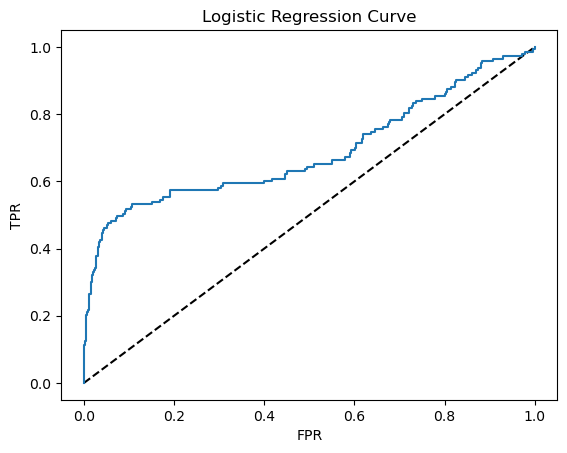

In [18]:
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic Regression Curve")
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.6870364174914934


### Поиск по сетки кроссвалидации

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {"alpha": np.linspace(0.0001, 1, 10),
"solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00]),
                         'solver': ['sag', 'lsqr']})


In [47]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {"alpha": np.linspace(0.0001, 1, 10),
"solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=5)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.2223} 0.033442388498413966


In [49]:
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.06900769909244175


### Классификационные деревья

In [63]:
from sklearn.tree import DecisionTreeClassifier
wbc = pd.read_csv("wbc.csv")
X = wbc.drop(["diagnosis", "id"], axis=1).values
y = wbc["diagnosis"].values
print(X.shape, y.shape)


(569, 31) (569,)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
dt = DecisionTreeClassifier(max_depth=2, random_state=2)

In [90]:
from sklearn.metrics import accuracy_score
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9210526315789473
